<a href="https://colab.research.google.com/github/Jakhongir0103/ML_learning/blob/main/Deep_learning_cat_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import fastai
import torch

## Building the Model

In [19]:
from fastai.vision.all import *
from ipywidgets import widgets

# loading data
path = untar_data(URLs.PETS)/'images'

# label_func
def is_cat(x): return x[0].isupper() # in our dataset, the names of the images of cats start with a Capital letter

# dataloader
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), seed=42, 
    label_func=is_cat, 
    item_tfms=Resize(224))

# train
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(2) 

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.102224,0.028274,0.989175,01:01


epoch,train_loss,valid_loss,accuracy,time
0,0.050091,0.043197,0.990528,01:12
1,0.025745,0.019250,0.991881,01:12


## Evaluation

In [23]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is it a cat?: True
Accuracy: 100.000%


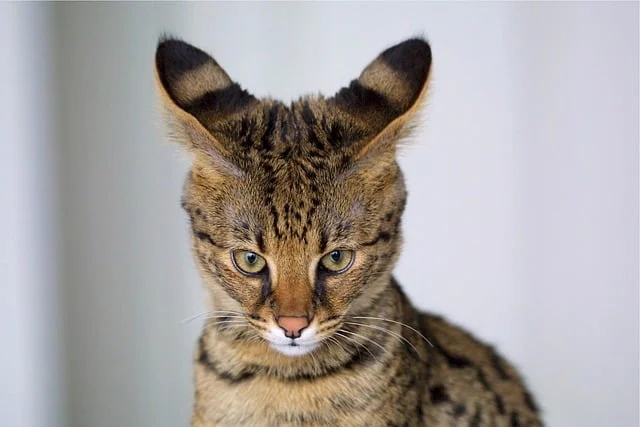

In [24]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Is it a cat?: {pred}')
print(f'Accuracy: {prob[1].item()*100:.3f}%')
img